In [3]:
import os
from pathlib import Path
root = Path('/Users/user/Coding/EV-D68-3C-protease/')
os.chdir(root)

In [4]:
!ls

01_reference-making          hits.sdf
02_hit-prep                  images
03_merge-fragmenstein        metadata-from-Fragalysis.csv
04_merge_network             pymol_snippet_junkyard.md
LICENSE                      reference.pdb
README.md                    stolen_hits.sdf
combo.pse                    test.pse
filtered_hits.sdf            workshop
fragmented_hits.sdf


In [8]:
import chempy

dir(chempy.Atom)

['__class__',
 '__cmp__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_order',
 'alt',
 'b',
 'chain',
 'color_code',
 'coord',
 'custom',
 'elec_radius',
 'flags',
 'formal_charge',
 'get_free_valence',
 'get_implicit_valence',
 'get_mass',
 'get_number',
 'get_signature',
 'has',
 'hetatm',
 'in_same_residue',
 'ins_code',
 'name',
 'new_in_residue',
 'numeric_type',
 'partial_charge',
 'q',
 'resi',
 'resi_number',
 'resn',
 'resn_code',
 'segi',
 'ss',
 'stereo',
 'symbol',
 'text_type',
 'vdw']

In [ ]:
import pymol2

with pymol2.PyMOL() as pymol:
    pymol.cmd.load('combo.pse')
    pymol.cmd.split_states('hits')
    nearby = pymol.cmd.get_object_list(selection='resn UNK and byres /D68EV3CPROA-x1741_0B_bound//A/HIS`161/NE2 around 3')

In [51]:
nearby

['stolen_hits',
 'hits',
 'x1498_0A_1',
 'x0980_0B_1',
 'x0147_0A_1',
 'x1498_1B_1',
 'x1594_0A_1',
 'x1537_0A_1',
 'x1604_0A_1',
 'x1498_0B_1']

In [25]:
from rdkit import Chem

with Chem.SDMolSupplier('filtered_hits.sdf') as sds:
    hits = list(sds)

In [42]:
[n.split('_')[0] for n in nearby]

['stolen',
 'hits',
 'x1498',
 'x0980',
 'x0147',
 'x1498',
 'x1594',
 'x1537',
 'x1604',
 'x1498']

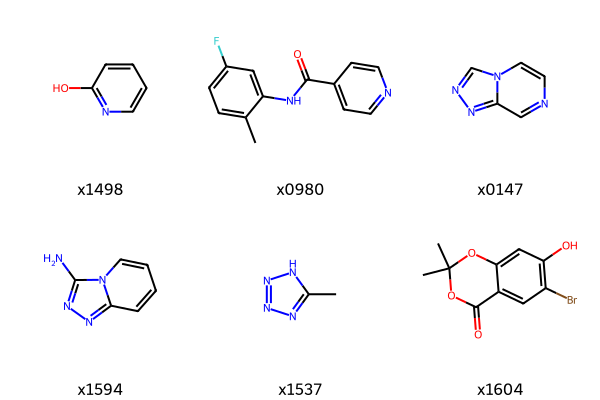

In [49]:
from rdkit.Chem import Draw, AllChem

flattos = {h.GetProp('_Name').split('L')[0]: Chem.Mol(h) for h in hits}
*map(AllChem.Compute2DCoords, flattos.values()),

flattos = {k:v for k,v in flattos.items() if k in [n.split('_')[0] for n in nearby]}

Draw.MolsToGridImage(list(flattos.values()), legends=list(flattos.keys()))

In [50]:
with open('H161_friends.png', 'wb') as fh:
    fh.write(_.data)

In [52]:
!ls

01_reference-making          fragmented_hits.sdf
02_hit-prep                  hits.sdf
03_merge-fragmenstein        images
04_merge_network             metadata-from-Fragalysis.csv
LICENSE                      pymol_snippet_junkyard.md
README.md                    reference.pdb
combo.pse                    stolen_hits.sdf
filtered_hits.sdf            workshop


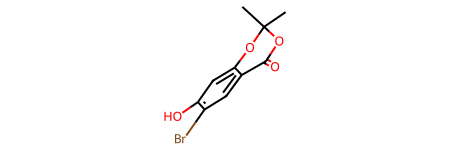

In [67]:
x1604 = {h.GetProp('_Name'): h for h in hits}['x1604L0AP1']
x1604

In [58]:
Chem.MolToSmiles(x1604)

'CC1(C)OC(=O)c2cc(Br)c(O)cc2O1'

In [84]:
bromophenol = Chem.MolFromSmiles('c1cc(Br)c(O)cc1')
bromophenol = Chem.MolFromSmarts('c1:c:c(-Br):c(-[OH1]):c:c:1')

import gzip

expansions = []

with gzip.open('../Functional-subsets-of-Enamine-BB/Enamine_BB_halogen.sdf.gz') as fh:
    with Chem.ForwardSDMolSupplier(fh) as s:
        for mol in s:
            if mol.HasSubstructMatch(bromophenol):
                expansions.append(mol)

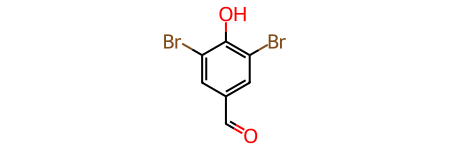

In [85]:
expansions[0]

In [86]:
len(expansions)

2317

In [101]:
with Chem.SDWriter('bromophenolics.sdf') as sd:
    for mol in expansions:
        sd.write(mol)

In [89]:
from rdkit.Chem import PandasTools
import pandas as pd
from pathlib import Path

path = Path.home() / 'Coding' / 'EV-D68-3C-protease' / '02_hit-prep' / 'combined_libraries.csv'

libraries = pd.read_csv(path)

In [90]:
libraries

,Unnamed: 0,Id,SMILES,library,Name
0,0,Y3D-01,CC1(C(N)=O)NCCC1,York3D,NaN
1,1,Y3D-02,CC1(COC)NCCC1,York3D,2-(methoxymethyl)-2-methylpyrrolidine
2,2,Y3D-03,CC1(C(O)=O)N(C(C)=O)CCC1,York3D,NaN
3,3,Y3D-04,CC1(C(N)=O)N(S(=O)(C)=O)CCC1,York3D,NaN
4,4,Y3D-05,CC1(C(O)=O)N(S(=O)(C)=O)CCC1,York3D,NaN
...,...,...,...,...,...
2733,139,Z4605084892,[I-].C[N+]=1C=CC=NC1Br,CovHetFrags,2-bromo-1-methylpyrimidin-1-ium iodide
2734,140,Z4605084895,[I-].[I-].C[N+]1=C[N+](C)(C=C)C=C1,CovHetFrags,"1-ethenyl-1,3-dimethyl-1H-imidazole-1,3-diium ..."
2735,141,Z57205012,[I-].C[N+]=1C=CC=CC1I,CovHetFrags,2-iodo-1-methylpyridin-1-ium iodide
2736,142,Z4605084888,[I-].C[N+]=1C=NC=C(I)C1,CovHetFrags,5-iodo-1-methylpyrimidin-1-ium iodide


In [93]:
# this does not decompose

from rdkit.Chem import BRICS

BRICS.BRICSDecompose(x1604)

{'CC1(C)OC(=O)c2cc(Br)c(O)cc2O1'}

In [94]:
!ls

01_reference-making          hits.sdf
02_hit-prep                  images
03_merge-fragmenstein        metadata-from-Fragalysis.csv
04_merge_network             pymol_snippet_junkyard.md
LICENSE                      reference.pdb
README.md                    stolen_hits.sdf
combo.pse                    temp.py
filtered_hits.sdf            workshop
fragmented_hits.sdf


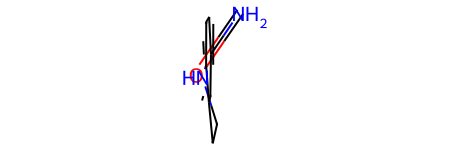

In [96]:
x0771 = {h.GetProp('_Name'): h for h in hits}['x0771L0AP1']
x0771

In [97]:

Chem.MolToMolFile(x1604, 'x1604.mol')
Chem.MolToMolFile(x0771, 'x0771.mol')

In [100]:
Chem.MolToMolFile(Chem.MolFromPDBBlock('''CRYST1   42.834   62.708  147.514  90.00  90.00  90.00 P 21 21 21    1
HETATM    1  O   LIG S  83      -6.112  12.505 -25.876  1.00 29.61           O  
HETATM    2  O   LIG S 164      -6.370   6.502 -34.522  1.00 40.58           O  
END'''), 'nice_HOH.mol')

In [111]:
from rdkit import Geometry

def get_bromine_pos(mol) -> Geometry.Point3D:
    bromine_zahl = 35
    bromine: Chem.Atom = next(mol.GetAtomsMatchingQuery(Chem.rdqueries.AtomNumEqualsQueryAtom(bromine_zahl)))
    br_idx: int = bromine.GetIdx()
    return mol.GetConformer().GetAtomPosition(br_idx)

ref = get_bromine_pos(x1604)
ref

In [114]:

with Chem.SDMolSupplier('rocs-monster2.sdf') as sdr, Chem.SDWriter('rocs-monster2.filtered.sdf') as sdw:
    for mol in sdr:
        if get_bromine_pos(mol).Distance(ref) > 1.:
            continue
        sdw.write(mol)
        